In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn; seaborn.set()

In [2]:
pd.__version__

'0.23.4'

# **Pandas Series**

In [3]:
ser= pd.Series(np.random.rand(10))
ser.head()

0    0.615781
1    0.556955
2    0.361928
3    0.097232
4    0.035160
dtype: float64

Series wraps both a sequence of values as well as a sequence of indices

In [4]:
ser.values

array([0.61578114, 0.55695476, 0.36192802, 0.09723238, 0.03516031,
       0.85074321, 0.85011212, 0.59516688, 0.21847112, 0.42530155])

In [5]:
ser.index

RangeIndex(start=0, stop=10, step=1)

_to access data:_

In [6]:
ser[0:3]

0    0.615781
1    0.556955
2    0.361928
dtype: float64

_indices can be strings as well_

In [7]:
ser= pd.Series(np.random.rand(5),index=['a','b','c',['d','e'],'f'])

In [8]:
ser

a         0.526294
b         0.998273
c         0.552507
[d, e]    0.238692
f         0.217120
dtype: float64

We can think of a Pandas Series a bit like a specialization of a Python dictionary. A dictionary is a structure that maps arbitrary keys to a set of arbitrary values, and **a Series is a structure that maps typed keys to a set of typed values**. This typing is important: just as the type-specific compiled code behind a NumPy array makes it more efficient than a Python list for certain operations, the type information of a Pandas Series makes it much more efficient than Python dictionaries for certain
operations.


In [9]:
dictionary= {'arunachal':'india',
             'lahore':'pakistan',
            'hong-kong':'china',
            'florida':'usa'}
data= pd.Series(dictionary)
data

arunachal       india
lahore       pakistan
hong-kong       china
florida           usa
dtype: object

In [10]:
data['arunachal']

'india'

In [11]:
data['arunachal':'hong-kong']

arunachal       india
lahore       pakistan
hong-kong       china
dtype: object

In [12]:
pd.Series({'a':'nishant','b':'hello','c':'there'},index=['a','c'])   #'b' won't be present in this case

a    nishant
c      there
dtype: object

# **pandas DataFrame**

In [13]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

In [14]:
 population_dict = {'California': 38332521,
    'Texas': 26448193,
    'New York': 19651127,
    'Florida': 19552860,
    'Illinois': 12882135}
population = pd.Series(population_dict)
population


California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [15]:
states= pd.DataFrame({'population':population,'area':area})

In [16]:
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [17]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

In [18]:
states.columns

Index(['population', 'area'], dtype='object')

In [19]:
states.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [20]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

### _various ways of creating Dataframe:_

_from pandas Series_

In [21]:
pd.DataFrame(population,columns=['popul'])

,popul
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


_from list of dictionaries_

In [22]:
data = [{'a':i, 'b':2*i} for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


_if some of the keys in the dictionary are missing, Pandas will fill them with **NaN** values._

In [23]:
pd.DataFrame([{'a':1,'b':2},{'c':3,'b':5}])

,a,b,c
0,1.0,2,NaN
1,NaN,5,3.0


_from dictionary of series objects_

In [24]:
states= pd.DataFrame({'population':population,'area':area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


_index can be thought of as an immutable array or an ordered set_

In [25]:
index= pd.Index([0,1,2,3,4])

In [26]:
index

Int64Index([0, 1, 2, 3, 4], dtype='int64')

_Data Indexing and Selection_

In [27]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [28]:
print('a' in data)
print(0.25 in data)

True
False


In [29]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [30]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

In [31]:
data.items

<bound method Series.iteritems of a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64>

In [32]:
data['a']= 15
data

a    15.00
b     0.50
c     0.75
d     1.00
dtype: float64

_indexing can be a source of confusion sometimes when index are numerical values as shown below. Explicit index are inclusive of the last value, while implicit indexing are not_

In [33]:
data= pd.Series(['a','b','c',('d','e')],index=[1,2,3,4])

In [34]:
data
print(data[0:3])    #implicit indexing; the last value is not inclusive of
print(data[3])      #explicit indesing  (returns the value of index 3)

1    a
2    b
3    c
dtype: object
c


_to get rid of this problem, pandas provide some special **indexers** attributes._

The **loc** attribute allows indexing and slicing that always references the explicit
index:


In [35]:
print(data)
print(data.loc[1])
print(data.loc[1:3])    #explicit indexing, and hence, the values from 1 to 3 (including) are printed

1         a
2         b
3         c
4    (d, e)
dtype: object
a
1    a
2    b
3    c
dtype: object


The **iloc** attribute allows indexing and slicing that always references the implicit
Python-style index:


In [36]:
print(data.iloc[0])
print(data.iloc[0:2])   #implicit indexing, and hence, the values from 1 to 2 (excluding) are printed

a
1    a
2    b
dtype: object


Another one is **ix** (hybrid of the two) which is depricated, and it's advisable to use **loc** and **iloc**

_data selection in DataFrame_

In [37]:
dummy_area= pd.Series({'Goa':1223,'Arunachal':21321,'Patna':12122})
dummy_population= pd.Series({'Prayag':2323222,'Goa':1222323,'Patna':33231,'Pune':89322})
data=pd.DataFrame({'area':dummy_area,'population':dummy_population})
data

,area,population
Arunachal,21321.0,NaN
Goa,1223.0,1222323.0
Patna,12122.0,33231.0
Prayag,NaN,2323222.0
Pune,NaN,89322.0


In [38]:
data['area']

Arunachal    21321.0
Goa           1223.0
Patna        12122.0
Prayag           NaN
Pune             NaN
Name: area, dtype: float64

In [39]:
data.area

Arunachal    21321.0
Goa           1223.0
Patna        12122.0
Prayag           NaN
Pune             NaN
Name: area, dtype: float64

In [40]:
data.area is data['area']

True

In [41]:
data

,area,population
Arunachal,21321.0,NaN
Goa,1223.0,1222323.0
Patna,12122.0,33231.0
Prayag,NaN,2323222.0
Pune,NaN,89322.0


_Adding another column:_

In [42]:
data['density']= data['population']/data['area']

In [43]:
data

,area,population,density
Arunachal,21321.0,NaN,NaN
Goa,1223.0,1222323.0,999.446443
Patna,12122.0,33231.0,2.741379
Prayag,NaN,2323222.0,NaN
Pune,NaN,89322.0,NaN


In [44]:
data.values  #returns a 2D array

array([[2.13210000e+04,            nan,            nan],
       [1.22300000e+03, 1.22232300e+06, 9.99446443e+02],
       [1.21220000e+04, 3.32310000e+04, 2.74137931e+00],
       [           nan, 2.32322200e+06,            nan],
       [           nan, 8.93220000e+04,            nan]])

In [45]:
data.T

,Arunachal,Goa,Patna,Prayag,Pune
area,21321.0,1.223000e+03,12122.000000,NaN,NaN
population,NaN,1.222323e+06,33231.000000,2323222.0,89322.0
density,NaN,9.994464e+02,2.741379,NaN,NaN


In [46]:
print(data)
data.iloc[:2,1:]  #implicit indexing

              area  population     density
Arunachal  21321.0         NaN         NaN
Goa         1223.0   1222323.0  999.446443
Patna      12122.0     33231.0    2.741379
Prayag         NaN   2323222.0         NaN
Pune           NaN     89322.0         NaN


,population,density
Arunachal,NaN,NaN
Goa,1222323.0,999.446443


In [47]:
data.loc['Arunachal':'Pryag','population']  #explicit indexing

Arunachal          NaN
Goa          1222323.0
Patna          33231.0
Prayag       2323222.0
Name: population, dtype: float64

In [48]:
data.ix[:3,'area'] 

/home/nishant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Arunachal    21321.0
Goa           1223.0
Patna        12122.0
Name: area, dtype: float64

In [49]:
data

,area,population,density
Arunachal,21321.0,NaN,NaN
Goa,1223.0,1222323.0,999.446443
Patna,12122.0,33231.0,2.741379
Prayag,NaN,2323222.0,NaN
Pune,NaN,89322.0,NaN


_indexing convensions can also be used to modify or set values_

In [50]:
data.dtypes

area          float64
population    float64
density       float64
dtype: object

In [51]:
data.iloc[0,0]= 'nishant'

dtype of 'area' has changed from _float_ to _object_ after assigning a string value to one element

In [52]:
data.dtypes

area           object
population    float64
density       float64
dtype: object


Any of the familiar NumPy-style data access patterns can be used within these indexers. For example, in the loc indexer we can combine masking and fancy indexing as in the following:


In [53]:
data.loc[data.density>100,['population','density']] #give rows where density > 100 and two column

,population,density
Goa,1222323.0,999.446443


1. **Indexing refers to columns and slicing refers to rows**

In [54]:
data['Arunachal':'Patna']  #last value included

,area,population,density
Arunachal,nishant,NaN,NaN
Goa,1223,1222323.0,999.446443
Patna,12122,33231.0,2.741379


2. **Such slices can also refer to rows by number rather than by index**

In [55]:
data[0:2] #last value not included

,area,population,density
Arunachal,nishant,NaN,NaN
Goa,1223,1222323.0,999.446443


**Any numpy ufunc will work on Pandas Series and Dataframe**

In [56]:
rng= np.random.RandomState(25)
ser= pd.Series(np.random.randint(0,10,4))
ser

0    7
1    2
2    5
3    7
dtype: int64

In [57]:
np.exp(ser)

0    1096.633158
1       7.389056
2     148.413159
3    1096.633158
dtype: float64

In [58]:
df = pd.DataFrame(np.random.randint(0,10,(3,4)),columns=['A','B','C','D'])
df

,A,B,C,D
0,5,0,8,4
1,7,6,5,9
2,9,4,6,4


In [59]:
np.sin(df.iloc[:,2])

0    0.989358
1   -0.958924
2   -0.279415
Name: C, dtype: float64

In [60]:
area = pd.Series({'Alaska': 1723337, 'Texas': 695662,
'California': 423967}, name='area')
population = pd.Series({'California': 38332521, 'Texas': 26448193,
'New York': 19651127}, name='population')



if the above two are operated (say finding density of population as below), the resulting array contains union of the indices of two input arrays.

In [61]:
population/area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

Any missing values are filled in with **NaN** by default.

If filling of **NaN** is not desired, we can also fill it with other value of our choice as:

In [62]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
print(A+B,'\n')
pd.Series.add(A,B,fill_value=0)

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64 



0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

Similarly in DataFrames, index alignment happnes:

In [63]:
A= pd.DataFrame(np.random.randint(0,100,(2,3)),columns=list('abc'))
B= pd.DataFrame(np.random.randint(0,100,(3,4)),columns=list('abcd'))

print(A,'\n')
print(B)

    a   b   c
0  15  79  45
1  95  40  85 

    a   b   c   d
0  15  38  31   1
1  15  59  54  33
2  53   4   8   1


In [64]:
print(A+B)

       a      b      c   d
0   30.0  117.0   76.0 NaN
1  110.0   99.0  139.0 NaN
2    NaN    NaN    NaN NaN


In [65]:
B.add(A,fill_value=0)

,a,b,c,d
0,30.0,117.0,76.0,1.0
1,110.0,99.0,139.0,33.0
2,53.0,4.0,8.0,1.0


In [66]:
A= pd.DataFrame(rng.randint(0,10,(3,5)))

In [67]:
print(A)
print()
print(A-A.iloc[0])

   0  1  2  3  4
0  4  6  7  2  8
1  4  9  4  5  1
2  7  3  8  7  3

   0  1  2  3  4
0  0  0  0  0  0
1  0  3 -3  3 -7
2  3 -3  1  5 -5


## **Handling missing data**

In [68]:
data = pd.Series([1, np.nan, 'hello', None])
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [69]:
print(data[data.isnull()])    #masking directly
print()
print(data[data.notnull()])   #masking directly

1     NaN
3    None
dtype: object

0        1
2    hello
dtype: object


_Dropping the missing values_

In [70]:
data.dropna(inplace=False)

0        1
2    hello
dtype: object

In [71]:
df = pd.DataFrame([[1,np.nan, 2],[2, 3,5],[np.nan, 4,6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [72]:
df.dropna()  #drop all rows with NA values

,0,1,2
1,2.0,3.0,5


In [73]:
df.dropna(axis='index') #axis=0

,0,1,2
1,2.0,3.0,5


In [74]:
df.dropna(axis='columns') #axis=1

,2
0,2
1,5
2,6


In [75]:
df[3]=np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [76]:
df.dropna(axis=1,how='all')  #since column 3 has all values as NaN, it is dropped

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [77]:
df.dropna(axis='rows',thresh=3)  #minimum 3 non-null values for each rows

,0,1,2,3
1,2.0,3.0,5,NaN


Also note, for axis we have used 'rows' and 'columns' to specify the 0 and 1 respectively.

In [78]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

In [79]:
data.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [80]:
data.fillna(method='ffill')  #similarly, 'bfill','backfill','pad', None can be used

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [81]:
print(df,'\n')
df.fillna(axis=1,method='ffill')

     0    1  2   3
0  1.0  NaN  2 NaN
1  2.0  3.0  5 NaN
2  NaN  4.0  6 NaN 



,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


Notice that if a previous value is not available during a forward fill, the NA value
remains.

## **Hierarchial Indexing**

In [82]:
index = [('California', 2000), ('California', 2010),('New York', 2000), ('New York', 2010),
    ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,18976457, 19378102,20851820, 25145561]


In [83]:
ser= pd.Series(populations,index=index)
ser

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

_A better way is to use the **MultiIndex**_

In [84]:
index= pd.MultiIndex.from_tuples(index)

In [85]:
index

MultiIndex(levels=[['California', 'New York', 'Texas'], [2000, 2010]],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]])

In [86]:
ser= ser.reindex(index)

In [87]:
ser

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

#### _indexing the multi-indexing_

In [88]:
ser[:,2010]

California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [89]:
ser['California'][2010]

37253956

In [90]:
ser['California',2010]

37253956

**The 'unstack()' method converts this series multiindex into a DataFrame**

In [91]:
df= ser.unstack()

In [92]:
df

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [93]:
df.iloc[1,1]

19378102

**'stack()' method provides the opposite operation**

In [94]:
df.stack()

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [95]:
higherdim_df = pd.DataFrame({'total': ser,'under18': [9267089, 9284094,4687374, 4318033,5906301, 6879014]})
higherdim_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

_all the ufuncs can be applied in the same way_

In [96]:
higherdim_df['fraction_u18']= higherdim_df['under18']/higherdim_df['total']

In [97]:
higherdim_df

total  under18  fraction_u18
California 2000  33871648  9267089      0.273594
           2010  37253956  9284094      0.249211
New York   2000  18976457  4687374      0.247010
           2010  19378102  4318033      0.222831
Texas      2000  20851820  5906301      0.283251
           2010  25145561  6879014      0.273568

In [98]:
higherdim_df.unstack()

total            under18          fraction_u18          
                2000      2010     2000     2010         2000      2010
California  33871648  37253956  9267089  9284094     0.273594  0.249211
New York    18976457  19378102  4687374  4318033     0.247010  0.222831
Texas       20851820  25145561  5906301  6879014     0.283251  0.273568

In [99]:
higherdim_df.iloc[0:2,:]

total  under18  fraction_u18
California 2000  33871648  9267089      0.273594
           2010  37253956  9284094      0.249211

In [100]:
higherdim_df

total  under18  fraction_u18
California 2000  33871648  9267089      0.273594
           2010  37253956  9284094      0.249211
New York   2000  18976457  4687374      0.247010
           2010  19378102  4318033      0.222831
Texas      2000  20851820  5906301      0.283251
           2010  25145561  6879014      0.273568

In [101]:
higherdim_df.loc[('California',2010),]

total           3.725396e+07
under18         9.284094e+06
fraction_u18    2.492110e-01
Name: (California, 2010), dtype: float64

In [102]:
higherdim_df.loc['California':'New York']

total  under18  fraction_u18
California 2000  33871648  9267089      0.273594
           2010  37253956  9284094      0.249211
New York   2000  18976457  4687374      0.247010
           2010  19378102  4318033      0.222831

In [103]:
higherdim_df.loc[(['California','New York'],2010), ]

,,total,under18,fraction_u18
California,2010,37253956,9284094,0.249211
New York,2010,19378102,4318033,0.222831


In [104]:
higherdim_df.loc[(slice(None),2010),]

,,total,under18,fraction_u18
California,2010,37253956,9284094,0.249211
New York,2010,19378102,4318033,0.222831
Texas,2010,25145561,6879014,0.273568


### **Ways to create MultiIndex**

Passing multiple index:

In [105]:
x= pd.DataFrame(np.random.rand(4,2),index= ([['a','c','c','b'],[1,2,1,2]]),columns=(['col1','col2']))
x

col1      col2
a 1  0.114806  0.582553
c 2  0.750139  0.850746
  1  0.854643  0.815987
b 2  0.192152  0.768059

passing dictionary with tuple as keys:

In [106]:
data = {('California', 2000): 33871648,
('California', 2010): 37253956,
('Texas', 2000): 20851820,
('Texas', 2010): 25145561,
('New York', 2000): 18976457,
('New York', 2010): 19378102}
pd.Series(data)

California  2000    33871648
            2010    37253956
Texas       2000    20851820
            2010    25145561
New York    2000    18976457
            2010    19378102
dtype: int64

Explicit MultiIndex creation:

In [107]:
pd.MultiIndex.from_arrays([['a','a','b','b'],[1,2,1,2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [108]:
pd.MultiIndex.from_tuples([('a',1),('a',2),('b',1),('b',2)])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [109]:
pd.MultiIndex.from_product([['a','b'],[1,2]])

MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

 directly using its internal encoding

In [110]:
pd.MultiIndex(levels=[['a', 'b'], [1, 2]],labels=[[0, 0, 1, 1], [0, 1, 0, 1]])


MultiIndex(levels=[['a', 'b'], [1, 2]],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

### **Naming the MultiIndex**

In [111]:
ser.index.names= ['state','year']

In [112]:
ser

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

## MultiIndex for DataFrame

In a DataFrame, the rows and columns are completely symmetric, and just as the rows
can have multiple levels of indices, the columns can have multiple levels as well.

Creating mock data below (4D data):

In [3]:
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
names=['subject', 'type'])

data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37

health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      26.0  38.4  26.0  37.4  48.0  38.2
     2      53.0  36.2  26.0  36.0  55.0  36.2
2014 1      36.0  37.3  40.0  36.2  51.0  36.9
     2      37.0  37.3  38.0  38.0  29.0  36.4

In [114]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      31.0  36.1
     2      39.0  36.4
2014 1      26.0  36.9
     2      18.0  35.4

In [115]:
health_data[['Bob','Sue']]

subject      Bob         Sue      
type          HR  Temp    HR  Temp
year visit                        
2013 1      28.0  38.2  37.0  36.9
     2      31.0  36.3  19.0  37.4
2014 1      23.0  35.8  62.0  36.9
     2      38.0  38.5  34.0  37.1

In [116]:
health_data.loc[(2013,1),('Guido', 'Temp')]

36.1

Working with slices within these index tuples is not especially convenient; trying to
create a slice within a tuple will lead to a syntax error. We could get around this by building the desired slice explicitly using Python’s built-in **slice()** function, but a better way in this context is to use an **IndexSlice** object,which Pandas provides for precisely this situation. For example:


In [117]:
health_data.loc[(slice(None),2),]

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 2      31.0  36.3  39.0  36.4  19.0  37.4
2014 2      38.0  38.5  18.0  35.4  34.0  37.1

In [118]:
print(health_data,'\n')
ind= pd.IndexSlice
health_data.loc[ind[:,2],ind['Bob':'Guido','HR']]

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      28.0  38.2  31.0  36.1  37.0  36.9
     2      31.0  36.3  39.0  36.4  19.0  37.4
2014 1      23.0  35.8  26.0  36.9  62.0  36.9
     2      38.0  38.5  18.0  35.4  34.0  37.1 



,subject,Bob,Guido
,type,HR,HR
year,visit,,
2013,2,31.0,39.0
2014,2,38.0,18.0


_the above can be thought of as,_ 

health_data.loc[ind[:,2],ind['Bob':'Guido','HR']], here,

**health_data.loc(row, column)**, where 

row i.e. **ind[:,2]** is **outer row slice**  to **inner row slice**

similarly, column i.e. **ind['Bob':'Guido','HR']]** is **outer column slice** to **inner column slice.**

**Many** of the MultiIndex slicing **operations will fail if the index is not sorted**. For example, below, some simple multiply indexed data where the indices are **not lexographically sorted**:

In [119]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.029943
      2      0.680970
c     1      0.236476
      2      0.971657
b     1      0.524014
      2      0.533937
dtype: float64

In [120]:
try:
    data['a':'b']
except KeyError as e:
    print(type(e))
    print(e)

<class 'pandas.errors.UnsortedIndexError'>
'Key length (1) was greater than MultiIndex lexsort depth (0)'


We can use **sort_index()** or **sortlevel()** methods of the DataFrame:

In [121]:
data=data.sort_index()

In [122]:
data

char  int
a     1      0.029943
      2      0.680970
b     1      0.524014
      2      0.533937
c     1      0.236476
      2      0.971657
dtype: float64

In [123]:
data['a':'b']

char  int
a     1      0.029943
      2      0.680970
b     1      0.524014
      2      0.533937
dtype: float64

In [124]:
higherdim_df

total  under18  fraction_u18
state      year                                 
California 2000  33871648  9267089      0.273594
           2010  37253956  9284094      0.249211
New York   2000  18976457  4687374      0.247010
           2010  19378102  4318033      0.222831
Texas      2000  20851820  5906301      0.283251
           2010  25145561  6879014      0.273568

In [125]:
higherdim_df.unstack(level=0) #first level is unstacked 

total                        under18                    \
state California  New York     Texas California New York    Texas   
year                                                                
2000    33871648  18976457  20851820    9267089  4687374  5906301   
2010    37253956  19378102  25145561    9284094  4318033  6879014   

      fraction_u18                      
state   California  New York     Texas  
year                                    
2000      0.273594  0.247010  0.283251  
2010      0.249211  0.222831  0.273568

In [126]:
higherdim_df.unstack(level=-1) #last index is unstacked (also default)

total            under18          fraction_u18          
year            2000      2010     2000     2010         2000      2010
state                                                                  
California  33871648  37253956  9267089  9284094     0.273594  0.249211
New York    18976457  19378102  4687374  4318033     0.247010  0.222831
Texas       20851820  25145561  5906301  6879014     0.283251  0.273568

### **Setting and Resetting index**

In [127]:
ser

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [128]:
ser_flat=ser.reset_index(name= 'population')
ser_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


Often when you are working with _data in the real world_, the raw input data looks like
the above and it’s useful to build a MultiIndex from the column values. This can be done
with the **set_index** method of the DataFrame, which returns a multiply indexed Data
Frame:


In [129]:
ser_flat.set_index(['state','year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

For hierarchically indexed data,  built-in _data aggregation methods_, like **mean(), max(),sum()** can be passed a level parameter that controls which subset of the data the aggregate is computed on.


In [130]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      28.0  38.2  31.0  36.1  37.0  36.9
     2      31.0  36.3  39.0  36.4  19.0  37.4
2014 1      23.0  35.8  26.0  36.9  62.0  36.9
     2      38.0  38.5  18.0  35.4  34.0  37.1

In [131]:
health_data.loc[pd.IndexSlice[:,2],('Guido')].mean() 

type
HR      28.5
Temp    35.9
dtype: float64

In [6]:
health_data.mean(level='year')    #by default, axis=0

subject   Bob       Guido         Sue       
type       HR  Temp    HR  Temp    HR   Temp
year                                        
2013     39.5  37.3  26.0  36.7  51.5  37.20
2014     36.5  37.3  39.0  37.1  40.0  36.65

In [29]:
print(health_data,'\n')
health_data.mean(axis=1,level='type')

#to change the index names/column names, we can use:
#health_data.index.set_names(['year','visit'],inplace=True)


subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      26.0  38.4  26.0  37.4  48.0  38.2
     2      53.0  36.2  26.0  36.0  55.0  36.2
2014 1      36.0  37.3  40.0  36.2  51.0  36.9
     2      37.0  37.3  38.0  38.0  29.0  36.4 



type               HR       Temp
year visit                      
2013 1      33.333333  38.000000
     2      44.666667  36.133333
2014 1      42.333333  36.800000
     2      34.666667  37.233333

Thus in two lines, we’ve been able to find the average heart rate and temperature measured among all subjects in all visits each year. This syntax is actually a shortcut to the **GroupBy**

cross checking the first value:

In [134]:
health_data.iloc[0,::2].mean()

32.0

### **Using xs to access the values in MultiIndex:**

In [33]:
print(health_data)
print(health_data.xs((2013,2)))   #accesses the 2013 and 2 in the axis=0 i.e. index

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      26.0  38.4  26.0  37.4  48.0  38.2
     2      53.0  36.2  26.0  36.0  55.0  36.2
2014 1      36.0  37.3  40.0  36.2  51.0  36.9
     2      37.0  37.3  38.0  38.0  29.0  36.4
subject  type
Bob      HR      53.0
         Temp    36.2
Guido    HR      26.0
         Temp    36.0
Sue      HR      55.0
         Temp    36.2
Name: (2013, 2), dtype: float64


In [34]:
print(health_data.xs(2, level=1))  #level is mentioned as 1 i.e. 'visit' is being reffered to here.

subject   Bob       Guido         Sue      
type       HR  Temp    HR  Temp    HR  Temp
year                                       
2013     53.0  36.2  26.0  36.0  55.0  36.2
2014     37.0  37.3  38.0  38.0  29.0  36.4


In [35]:
print(health_data.xs(key='Temp',level=1,axis=1))

subject      Bob  Guido   Sue
year visit                   
2013 1      38.4   37.4  38.2
     2      36.2   36.0  36.2
2014 1      37.3   36.2  36.9
     2      37.3   38.0  36.4


### **Combining Dataset: concat, append**

Created a dummy data

In [135]:
def make_df(col,ind):
    """making a sample dataframe"""
    data= {c: [str(c)+str(i) for i in ind] for c in col}
    return pd.DataFrame(data,ind)
make_df(list('ABCDEF'),range(5))

,A,B,C,D,E,F
0,A0,B0,C0,D0,E0,F0
1,A1,B1,C1,D1,E1,F1
2,A2,B2,C2,D2,E2,F2
3,A3,B3,C3,D3,E3,F3
4,A4,B4,C4,D4,E4,F4


Pandas has a function, **pd.concat()**, which has a similar syntax to **np.concatenate**, but with additional options:

In [136]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1,ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

for higher dimensional data:

In [137]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
print(df1,'\n')
print(df2,'\n')
print(pd.concat([df1,df2],axis='columns'))

    A   B
1  A1  B1
2  A2  B2 

    A   B
3  A3  B3
4  A4  B4 

     A    B    A    B
1   A1   B1  NaN  NaN
2   A2   B2  NaN  NaN
3  NaN  NaN   A3   B3
4  NaN  NaN   A4   B4


One important difference between np.concatenate and pd.concat is that **Pandas
concatenation preserves indices**, even if the result will have duplicate indices:


In [138]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])

print(x,'\n')
print(y,'\n')

x.index= y.index   #making both indices same

    A   B
0  A0  B0
1  A1  B1 

    A   B
2  A2  B2
3  A3  B3 



In [139]:
print(x,'\n'); print(y,'\n');print(pd.concat([x,y]))  #indices are preserved,even though they are the same

    A   B
2  A0  B0
3  A1  B1 

    A   B
2  A2  B2
3  A3  B3 

    A   B
2  A0  B0
3  A1  B1
2  A2  B2
3  A3  B3


We can check if any index is repeated or not

In [140]:
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)


ValueError: Indexes have overlapping values: Int64Index([2, 3], dtype='int64')


We can also ignore the index as:

In [141]:
 print(x,'\n'); print(y,'\n'); print(pd.concat([x, y], ignore_index=True))

    A   B
2  A0  B0
3  A1  B1 

    A   B
2  A2  B2
3  A3  B3 

    A   B
0  A0  B0
1  A1  B1
2  A2  B2
3  A3  B3


We can add multiindex key as:

In [142]:
print(x); print(y); print(pd.concat([x, y], keys=['x', 'y']))

    A   B
2  A0  B0
3  A1  B1
    A   B
2  A2  B2
3  A3  B3
      A   B
x 2  A0  B0
  3  A1  B1
y 2  A2  B2
  3  A3  B3


### **Concatenation with joins:**

In practice, data from different sources might have different sets of column names, and pd.concat offers several options in this case. Consider the concatenation of the following two s, which have some (but not all!)

In [143]:
df5= make_df('ABC',[1,2]); df6= make_df('BCD',[3,4]);

In [144]:
print(df5,'\n');print(df6,'\n');print(pd.concat([df5,df6],sort=False,join='outer')) #union

    A   B   C
1  A1  B1  C1
2  A2  B2  C2 

    B   C   D
3  B3  C3  D3
4  B4  C4  D4 

     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


In [145]:
print(df5,'\n');print(df6,'\n');print(pd.concat([df5,df6],sort=False,join='inner')) #intersection

    A   B   C
1  A1  B1  C1
2  A2  B2  C2 

    B   C   D
3  B3  C3  D3
4  B4  C4  D4 

    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4


Another option is to directly specify the index of the remaining colums using the **join_axes** argument, which takes a list of index objects. Here we’ll specify that the returned columns should be the same as those of the first input:


In [146]:
print(df5,'\n');print(df6,'\n');print(pd.concat([df5,df6],sort=False,join_axes=[df5.columns]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2 

    B   C   D
3  B3  C3  D3
4  B4  C4  D4 

     A   B   C
1   A1  B1  C1
2   A2  B2  C2
3  NaN  B3  C3
4  NaN  B4  C4


In [147]:
print(pd.concat([df5,df6],axis=1,join_axes=[df6.index]))
print()
print(pd.concat([df5,df6],axis=1,join_axes=[df5]))

     A    B    C   B   C   D
3  NaN  NaN  NaN  B3  C3  D3
4  NaN  NaN  NaN  B4  C4  D4

                A    B    C    B    C    D
(A1, B1, C1)  NaN  NaN  NaN  NaN  NaN  NaN
(A2, B2, C2)  NaN  NaN  NaN  NaN  NaN  NaN


append is **not very efficient** as it leads to the creation of new index and data buffers and it's better to use concat.

In [148]:
df5.append(df6,sort=False)   

,A,B,C,D
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,NaN,B3,C3,D3
4,NaN,B4,C4,D4


## **Merges and Joins**

**pd.merge()** implements a number of types of joins: _one to one, many to one, many to many_ joins.

### **one to one merge** (similar to column-wise concatenation)

In [149]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
    'hire_date': [2004, 2008, 2012, 2014]})
print(df1); 
print()
print(df2)


  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014


In [150]:
df3=pd.merge(df1,df2)
print(df3)

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


The pd.merge() function recognizes that each DataFrame has an “employee” column, and automatically joins using this column as a key. The result of the merge is a new DataFrame that combines the information from the two inputs.

Note: **Merge in general discards the index**

### **Many to one merge**

Many-to-one joins are joins in which one of the two key columns contains duplicate
entries.

In [151]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
    'supervisor': ['Carly', 'Guido', 'Steve']})
print(df4)
print()
df5= pd.merge(df3,df4)
print(df5)

         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve


### **many to many merge**

If the key column in both the left and right array contains duplicates, then the result is a many-to-many merge.


In [152]:
df6 = pd.DataFrame({'group': ['Accounting', 'Accounting',
'Engineering', 'Engineering', 'HR', 'HR'], 
'skills': ['math', 'spreadsheets', 'coding', 'linux',
'spreadsheets', 'organization']})

print(df1,'\n'); print(df6,'\n');print(pd.merge(df1,df6))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR 

         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization 

  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


In practice, datasets are rarely as clean as the one we’re working with here. We look into the options provided by pd.merge() that enables us to tune how the join operation works.


### **Specification on the merge key**  (the _on_ keyword) 

In [153]:
print(df1)
print()
print(df2)
print()
print(pd.merge(df1,df2,on='employee'))

  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014


### This option works only if both the left and right DataFrames have the specified column name.


In [154]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
'salary': [70000, 80000, 120000, 90000]})
print(df1);print(); print(df3);print()
print(pd.merge(df1, df3, left_on="employee", right_on="name"))


  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

  employee        group  name  salary
0      Bob   Accounting   Bob   70000
1     Jake  Engineering  Jake   80000
2     Lisa  Engineering  Lisa  120000
3      Sue           HR   Sue   90000


#### above, we have 'employee name' written as 'name'; we can use **left_on** and **right_on** to specify the two column names. We can then drop the redundant column if we want to with **drop()**

In [155]:
 pd.merge(df1, df3, left_on="employee", right_on="name").drop(columns='name')

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


or, here we could have changed the column name of employee before merging as:

df1.columns=['name','group']

### **merging on index:**
1. Using merge()

In [156]:
df1a= df1.set_index(['employee'])
df2a= df2.set_index(['employee'])
print(df1a);print();print(df2a)

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR

          hire_date
employee           
Lisa           2004
Bob            2008
Jake           2012
Sue            2014


In [157]:
pd.merge(df1a,df2a,left_index=True,right_index=True)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


**For convenience, DataFrames implement the join() method, which performs a merge that defaults to joining on indices:**

In [158]:
df1a.join(df2a)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


### NOTE:

In [159]:
print(df1a);print();print(df3);print();print(pd.merge(df1a,df3,left_index=True,right_on='name'))

                group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR

   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000
3   Sue   90000

         group  name  salary
0   Accounting   Bob   70000
1  Engineering  Jake   80000
2  Engineering  Lisa  120000
3           HR   Sue   90000


All of these options also work with multiple indices and/or multiple columns.

#### **by default, how='inner'** which means, intersection.

In [160]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
    'food': ['fish', 'beans', 'bread']},
columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
    'drink': ['wine', 'beer']},
columns=['name', 'drink'])
print(df6);print(); print(df7);print(); print(pd.merge(df6, df7))


    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

     name drink
0    Mary  wine
1  Joseph  beer

   name   food drink
0  Mary  bread  wine


In [161]:
print(df6);print(); print(df7);print(); print(pd.merge(df6, df7,how='outer'))  #outer=> union


    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

     name drink
0    Mary  wine
1  Joseph  beer

     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer


The left join and right join return join over the left entries and right entries, respectively. 

In [162]:
print(df6);print(); print(df7);print(); print(pd.merge(df6, df7,how='left'))

    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

     name drink
0    Mary  wine
1  Joseph  beer

    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine


In [163]:
print(df6);print(); print(df7);print(); print(pd.merge(df6, df7,how='right'))


    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

     name drink
0    Mary  wine
1  Joseph  beer

     name   food drink
0    Mary  bread  wine
1  Joseph    NaN  beer


If two columns are at conflict:

In [164]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
'rank': [1, 2, 3, 4]})

df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
'rank': [3, 1, 4, 2]})

pd.merge(df8,df9, on= 'name')

,name,rank_x,rank_y
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


Because the output would have two conflicting column names, the merge function automatically appends a suffix _x or _y to make the output columns unique. If we want, we can change the suffixes:

These suffixes work in any of the possible join patterns, and work also if there are multiple overlapping columns.



In [165]:
pd.merge(df8,df9,on='name',suffixes=('_df8','_df9'))

,name,rank_df8,rank_df9
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


### **Example: US states and their population:**

**We want to rank US states and territories by the 2010 population density**

In [166]:
population= pd.read_csv('https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/state-population.csv')
area= pd.read_csv('https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/state-areas.csv')
abbreviation= pd.read_csv('https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/state-abbrevs.csv')

In [167]:
print(population.head())
population.count()

  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0


state/region    2544
ages            2544
year            2544
population      2524
dtype: int64

In [168]:
print(area.head())
area.count()

        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707


state            52
area (sq. mi)    52
dtype: int64

In [169]:
print(abbreviation.head())
abbreviation.count()

        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA


state           51
abbreviation    51
dtype: int64

In [170]:
merged= pd.merge(population,abbreviation,how='outer',left_on='state/region',right_on='abbreviation')
print(merged.head())
print()
print(merged.shape)
print()
(merged['state/region']==merged['abbreviation']).shape

#this means, the 'state/region' and 'abbreviation' are same and hence, we can drop one 

merged.drop(columns='abbreviation',inplace=True) #dropeed the 'abbreviation' column

  state/region     ages  year  population    state abbreviation
0           AL  under18  2012   1117489.0  Alabama           AL
1           AL    total  2012   4817528.0  Alabama           AL
2           AL  under18  2010   1130966.0  Alabama           AL
3           AL    total  2010   4785570.0  Alabama           AL
4           AL  under18  2011   1125763.0  Alabama           AL

(2544, 6)



In [171]:
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [172]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [173]:
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


As we can see above, the state values are also null; which means, it was not present in the 'abbreviation'. We can find null states and corresponding 'state/region' by following (**Note how it works**)

In [174]:
# merged[merged['state'].isnull()]['state/region'].unique()
merged.loc[merged['state'].isnull(),'state/region'].unique()

array(['PR', 'USA'], dtype=object)

We can then fill the corresponding state names with 'Puerto Rico' and 'United States'

In [175]:
merged.loc[merged['state/region']=='PR','state']= 'Puerto Rico'
merged.loc[merged['state/region']=='USA','state']= 'United States'

In [176]:
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [177]:
merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


Now we can merge the area with the merged on state

In [178]:
final=pd.merge(merged,area,on='state',how='left')
print(final.shape)
final.head()


(2544, 6)


,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [179]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

There are null values in both population and area(sq. mi). we can check, which state has corresponding null values in the area(sq. mi):

In [180]:
final['state'][final['area (sq. mi)'].isnull()].unique()  

array(['United States'], dtype=object)

we can fill the united states area with the sum of areas from all the states:

In [181]:
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [182]:
final.loc[final['state']!='United States','area (sq. mi)'].unique().sum()

3790399.0

But, we won't do that here, and simply drop the values of US because the population density is not relevant here:

In [183]:
print(final.shape)
final.dropna(inplace=True)
print(final.shape)

(2544, 6)
(2476, 6)


In [184]:
final.isnull().any()

state/region     False
ages             False
year             False
population       False
state            False
area (sq. mi)    False
dtype: bool

In [185]:
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [186]:
data2010=final[(final['ages']=='total') & (final['year']==2010)]
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


Or, we could do the above step using the **query()** function:

In [187]:
data2010= final.query('year==2010 & ages=="total"')
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


it would be better to have the state as an index rather than numbers as index:

In [188]:
print(data2010.shape)
data2010.set_index('state',inplace=True)
data2010.head()

(52, 6)


,state/region,ages,year,population,area (sq. mi)
state,,,,,
Alabama,AL,total,2010,4785570.0,52423.0
Alaska,AK,total,2010,713868.0,656425.0
Arizona,AZ,total,2010,6408790.0,114006.0
Arkansas,AR,total,2010,2922280.0,53182.0
California,CA,total,2010,37333601.0,163707.0


In [189]:
density = data2010['population']/data2010['area (sq. mi)']
pd.Series.sort_values(density,ascending=False,inplace=True)
density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [190]:
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

## **Aggregation and grouping** 

Using the planet dataset in seaborn library:

In [191]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [192]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


For a DataFrame, by default the aggregates return results within each column, **example:**

In [193]:
df = pd.DataFrame({'A': rng.rand(5),'B': rng.rand(5)})
print(df.mean())
print(df.mean(axis='columns') )

A    0.513613
B    0.528849
dtype: float64
0    0.418855
1    0.656967
2    0.432249
3    0.445430
4    0.652653
dtype: float64


In [194]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


### **Groupby as _split, apply and combine_**

In [195]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
'data': range(6)}, columns=['key', 'data'])
df


,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [196]:
df.groupby('key')

It returns a DataFrameGroupBy object and not a DataFrame. This insures, that common aggregates can be implemented very efficiently:

In [197]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


We can access the columns too as:

In [198]:
planets.groupby('method')['orbital_period']

In [199]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [200]:
planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


Perhaps the most important operations made available by a GroupBy are **aggregate,
filter, transform, and apply.** 


In [201]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
'data1': range(6),
'data2': rng.randint(0, 10, 6)},
columns = ['key', 'data1', 'data2'])
df


,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


aggregate() method allows for more flexibility. It can take **a string, a function, or a list** thereof, and compute all the aggregates at once


In [202]:
df.groupby('key').aggregate(['min',np.median,max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [203]:
df.groupby('key').aggregate({'data1': 'min','data2': 'max'})


,data1,data2
key,,
A,0,5
B,1,7
C,2,9


filter allows us to filter out values based on group properties; eg:

In [204]:
print(df.groupby('key').std())
df.groupby('key').filter(lambda x: x['data2'].std()>4)

       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641


,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


While aggregation must return a reduced version of the data, transformation can return some transformed version of the full data to recombine. For such a transformation, **the output is the same shape as the input.** A common example is to center the data by subtracting the group-wise mean:


In [205]:
df.groupby('key').transform(lambda x: x-x.mean())

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


Apply lets us apply an arbitrary function to the group of results:

In [206]:
def norm_by_data2(x):
    x['data1'] /= x['data2'].sum()
    return x

df.groupby('key').apply(norm_by_data2)

,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3
3,A,0.375000,3
4,B,0.571429,7
5,C,0.416667,9


**Example**: finding the discovered planets by methods and decades:-

In [207]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


decade                         1980s  1990s  2000s  2010s
method                                                   
Astrometry                       0.0    0.0    0.0    2.0
Eclipse Timing Variations        0.0    0.0    5.0   10.0
Imaging                          0.0    0.0   29.0   21.0
Microlensing                     0.0    0.0   12.0   15.0
Orbital Brightness Modulation    0.0    0.0    0.0    5.0
Pulsar Timing                    0.0    9.0    1.0    1.0
Pulsation Timing Variations      0.0    0.0    1.0    0.0
Radial Velocity                  1.0   52.0  475.0  424.0
Transit                          0.0    0.0   64.0  712.0
Transit Timing Variations        0.0    0.0    0.0    9.0


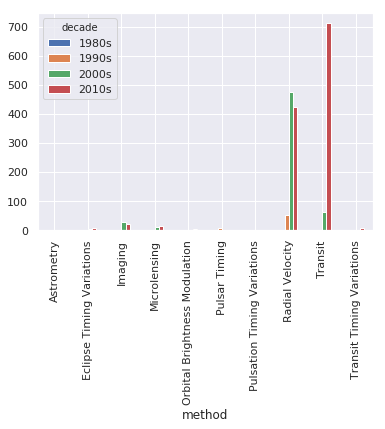

In [208]:
decade= 10*(planets['year']//10)
decade= decade.astype(str) + 's'
decade.name= 'decade'
x=planets.groupby(['method',decade])['number'].sum().unstack().fillna(0)
print(x)
x.plot(kind='bar')
plt.show()

## **Pivot Tables**

In [209]:
#getting sample titanic data:

titanic= sns.load_dataset('titanic')

In [210]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [211]:
titanic.groupby('sex').mean()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305


In [212]:
titanic.groupby('class').mean()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,0.629630,1.0,38.233441,0.416667,0.356481,84.154687,0.550926,0.504630
Second,0.472826,2.0,29.877630,0.402174,0.380435,20.662183,0.538043,0.565217
Third,0.242363,3.0,25.140620,0.615071,0.393075,13.675550,0.649695,0.659878


In [213]:
titanic.groupby(['sex','class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


the above two-dimensional GroupBy is common enough that Pandas includes a convenience routine, pivot_table, which succinctly handles this type of multidimensional aggregation. The above can be written as:


In [214]:
titanic.pivot_table('survived',columns='class',index='sex')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [215]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [216]:
age=pd.cut(titanic['age'],[0,18,titanic.age.max()])
titanic.pivot_table('survived',index=['sex',age],columns='class')

class                   First    Second     Third
sex    age                                       
female (0.0, 18.0]   0.909091  1.000000  0.511628
       (18.0, 80.0]  0.972973  0.900000  0.423729
male   (0.0, 18.0]   0.800000  0.600000  0.215686
       (18.0, 80.0]  0.375000  0.071429  0.133663

We can do the same with columns too:

In [217]:
fare= pd.qcut(titanic['fare'],2)  #where 2 means median i.e. 2-quantile
titanic.pivot_table('survived',index=['sex',age],columns=['class',fare])

class                          First                             Second  \
fare                (-0.001, 14.454] (14.454, 512.329] (-0.001, 14.454]   
sex    age                                                                
female (0.0, 18.0]               NaN          0.909091         1.000000   
       (18.0, 80.0]              NaN          0.972973         0.880000   
male   (0.0, 18.0]               NaN          0.800000         0.000000   
       (18.0, 80.0]              0.0          0.391304         0.098039   

class                                            Third                    
fare                (14.454, 512.329] (-0.001, 14.454] (14.454, 512.329]  
sex    age                                                                
female (0.0, 18.0]           1.000000         0.714286          0.318182  
       (18.0, 80.0]          0.914286         0.444444          0.391304  
male   (0.0, 18.0]           0.818182         0.260870          0.178571  
       (18.0, 80.0]          0.030303         0.125000          0.192308

We can use the **aggfunc** to control what type of aggregation is applied. Default is **mean**. We don't need to provide the **value**, if we mention it in the aggfunc.

In [218]:
titanic.pivot_table(columns='class',index='sex',aggfunc={'survived':sum,'fare':'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

At times it’s useful to compute totals along each grouping. This can be done via the margins keyword:

In [219]:
titanic.pivot_table('survived',columns='sex',index='class',margins=True)

sex,female,male,All
class,,,
First,0.968085,0.368852,0.629630
Second,0.921053,0.157407,0.472826
Third,0.500000,0.135447,0.242363
All,0.742038,0.188908,0.383838


**Example: Birthday Data** (this link is corrupted offline, so downloading this here): 

In [220]:
!curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  258k  100  258k    0     0   369k      0 --:--:-- --:--:-- --:--:--  368k


In [221]:
births= pd.read_csv('births.csv')

In [222]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [223]:
births['decade']= (births['year']//10)*10

In [224]:
births.pivot_table('births',columns='gender',index='decade',aggfunc=sum)

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


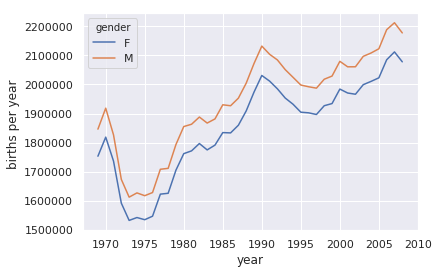

In [225]:
births.pivot_table('births',columns='gender',index='year',aggfunc=sum).plot()
plt.ylabel('births per year ');

### **Removing outliers:**

In [226]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


We must start by cleaning the data a bit, removing outliers caused by mistyped dates (e.g., June 31st) or missing values (e.g., June 99th). _One easy way to remove these all at once is to **cut outliers;**_ we’ll do this via a robust **sigma-clipping operation:**


In [227]:
quartiles= np.percentile(births['births'],[25,50,75])
print(quartiles)
mu=quartiles[1]
sig= 0.74*(quartiles[2]-quartiles[0])

[4358.  4814.  5289.5]


0.74 comes from the interquartile range of the standard normal distribution:



In [228]:
# from scipy.stats import norm
# p1=norm.ppf(0.25)
# p2=norm.ppf(0.75)
# print(p2-p1)

# correlation_factor=norm.std()/(p2-p1)
# print(correlation_factor)

In [229]:
births= births.query("(births> @mu-5*@sig) & (births< @mu+5*@sig)")  #why 5??

In [230]:
births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14610 entries, 0 to 15066
Data columns (total 6 columns):
year      14610 non-null int64
month     14610 non-null int64
day       14610 non-null float64
gender    14610 non-null object
births    14610 non-null int64
decade    14610 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 799.0+ KB


We would convert the day value to int (thus removing any fractional values )

In [231]:
births['day']= births['day'].astype(int)

Now we can combine the day, month and year to create a date index:

In [232]:
births.index = pd.to_datetime(10000*births.year+100*births.month+births.day,format='%Y%m%d')

In [233]:
births.head()

,year,month,day,gender,births,decade
1969-01-01,1969,1,1,F,4046,1960
1969-01-01,1969,1,1,M,4440,1960
1969-01-02,1969,1,2,F,4454,1960
1969-01-02,1969,1,2,M,4548,1960
1969-01-03,1969,1,3,F,4548,1960


In [234]:
births['dayofweek']= births.index.dayofweek

In [235]:
births.head()

,year,month,day,gender,births,decade,dayofweek
1969-01-01,1969,1,1,F,4046,1960,2
1969-01-01,1969,1,1,M,4440,1960,2
1969-01-02,1969,1,2,F,4454,1960,3
1969-01-02,1969,1,2,M,4548,1960,3
1969-01-03,1969,1,3,F,4548,1960,4


finding births by weekdays for several decades:

In [236]:
births.pivot_table('births', index='dayofweek',columns='decade', aggfunc='mean')

decade,1960,1970,1980
dayofweek,,,
0,5063.826923,4689.097701,5276.907249
1,5286.096154,4885.252399,5503.842553
2,5074.622642,4750.376200,5367.642553
3,4978.288462,4696.923372,5333.485106
4,5107.884615,4782.095785,5393.087234
5,4651.057692,4207.784483,4483.901064
6,4342.346154,3979.278736,4308.120469


plotting the above result:

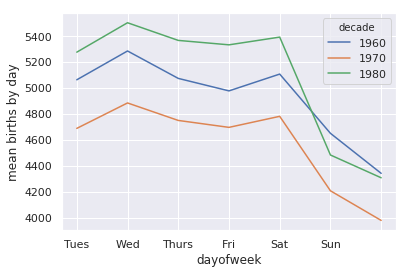

In [237]:
births.pivot_table('births', index='dayofweek',columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');


## **Sample data loaded and cleaned from "data.gov.in"**

In [240]:
import json
import requests

d=json.loads(requests.get('https://data.gov.in/node/95304/datastore/export/json').text)
list(d.keys())

pd.DataFrame(d["data"], columns=[x["label"] for x in d["fields"]]).head()

/home/nishant/anaconda3/lib/python3.6/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


,India/States/Union Territories,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,ALL INDIA,36.9,36.6,34.6,34.5,35.2,34.4,33,33.3,33.1,...,24.8,24.1,23.8,23.5,23.1,22.8,22.5,22.1,21.8,21.6
1,Andhra Pradesh,34.8,35.8,31.6,34.6,34.9,33.7,32.2,33.6,31.9,...,20.4,19,19.1,18.9,18.7,18.4,18.3,17.9,17.5,17.5
2,Assam,38.5,36.4,33.3,32.8,30.1,32.8,30.1,30.8,32.4,...,26.3,25.1,25,24.6,24.3,23.9,23.6,23.2,22.8,22.5
3,Bihar,32.8,33.1,31.4,28.7,27.7,31.1,30.1,31.2,38.4,...,30.7,30.2,30.4,29.9,29.4,28.9,28.5,28.1,27.7,27.7
4,Chhatisgarh,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,25.2,27.4,27.2,26.9,26.5,26.1,25.7,25.3,24.9,24.5


In [241]:
import json
import requests

data= json.loads(requests.get('https://data.gov.in/node/95304/datastore/export/json').text)
data.keys()

dict_keys(['fields', 'data'])

In [242]:
x=pd.DataFrame(data['data'],columns=[i['label'] for i in data['fields']])

In [243]:
x.set_index(x.iloc[:,0],inplace=True)

In [244]:
x.drop(columns='India/States/Union Territories',inplace=True)

In [245]:
x.head()

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
India/States/Union Territories,,,,,,,,,,,,,,,,,,,,,
ALL INDIA,36.9,36.6,34.6,34.5,35.2,34.4,33,33.3,33.1,33.3,...,24.8,24.1,23.8,23.5,23.1,22.8,22.5,22.1,21.8,21.6
Andhra Pradesh,34.8,35.8,31.6,34.6,34.9,33.7,32.2,33.6,31.9,31,...,20.4,19,19.1,18.9,18.7,18.4,18.3,17.9,17.5,17.5
Assam,38.5,36.4,33.3,32.8,30.1,32.8,30.1,30.8,32.4,31.9,...,26.3,25.1,25,24.6,24.3,23.9,23.6,23.2,22.8,22.5
Bihar,32.8,33.1,31.4,28.7,27.7,31.1,30.1,31.2,38.4,37.8,...,30.7,30.2,30.4,29.9,29.4,28.9,28.5,28.1,27.7,27.7
Chhatisgarh,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,25.2,27.4,27.2,26.9,26.5,26.1,25.7,25.3,24.9,24.5


In [246]:
x=x.replace('NA',np.nan)  #since the null values are strings

In [247]:
x.head()

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
India/States/Union Territories,,,,,,,,,,,,,,,,,,,,,
ALL INDIA,36.9,36.6,34.6,34.5,35.2,34.4,33,33.3,33.1,33.3,...,24.8,24.1,23.8,23.5,23.1,22.8,22.5,22.1,21.8,21.6
Andhra Pradesh,34.8,35.8,31.6,34.6,34.9,33.7,32.2,33.6,31.9,31,...,20.4,19,19.1,18.9,18.7,18.4,18.3,17.9,17.5,17.5
Assam,38.5,36.4,33.3,32.8,30.1,32.8,30.1,30.8,32.4,31.9,...,26.3,25.1,25,24.6,24.3,23.9,23.6,23.2,22.8,22.5
Bihar,32.8,33.1,31.4,28.7,27.7,31.1,30.1,31.2,38.4,37.8,...,30.7,30.2,30.4,29.9,29.4,28.9,28.5,28.1,27.7,27.7
Chhatisgarh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.2,27.4,27.2,26.9,26.5,26.1,25.7,25.3,24.9,24.5


In [248]:
pd.set_option('display.max_columns',100)
x=x.astype('float')
x.fillna(x.mean(axis=1)).head()

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
India/States/Union Territories,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ALL INDIA,36.9,36.6,34.6,34.5,35.2,34.4,33.0,33.3,33.1,33.3,33.9,33.8,33.7,33.9,32.9,32.6,32.2,31.5,30.6,30.2,29.5,29.2,28.7,28.7,28.3,27.5,27.2,26.5,26.0,25.8,25.4,25.0,24.8,24.1,23.8,23.5,23.1,22.8,22.5,22.1,21.8,21.6
Andhra Pradesh,34.8,35.8,31.6,34.6,34.9,33.7,32.2,33.6,31.9,31.0,31.7,31.2,30.8,31.2,29.9,31.6,30.3,27.4,25.9,26.3,26.0,24.5,24.3,23.8,24.2,22.8,22.5,22.4,21.7,21.3,21.0,20.7,20.4,19.0,19.1,18.9,18.7,18.4,18.3,17.9,17.5,17.5
Assam,38.5,36.4,33.3,32.8,30.1,32.8,30.1,30.8,32.4,31.9,33.0,34.2,34.7,35.3,34.3,34.7,34.2,32.9,29.4,29.7,30.9,30.8,29.5,30.8,29.3,27.6,28.2,27.9,27.0,26.9,27.0,26.6,26.3,25.1,25.0,24.6,24.3,23.9,23.6,23.2,22.8,22.5
Bihar,32.8,33.1,31.4,28.7,27.7,31.1,30.1,31.2,38.4,37.8,39.1,37.3,37.2,39.9,37.8,36.5,36.6,37.3,34.3,32.9,30.7,32.2,32.0,32.5,32.1,32.1,31.7,31.1,31.5,31.9,31.2,30.9,30.7,30.2,30.4,29.9,29.4,28.9,28.5,28.1,27.7,27.7
Chhatisgarh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.2,28.7,26.9,26.7,26.5,25.0,25.2,27.4,27.2,26.9,26.5,26.1,25.7,25.3,24.9,24.5


In [249]:
cleaned_data=x.T.fillna(x.mean(axis=1)).T  #had to transpose, since row wise mean replacement is not implemented in pandas

In [250]:
cleaned_data.head()

,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
India/States/Union Territories,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ALL INDIA,36.90000,36.60000,34.60000,34.50000,35.20000,34.40000,33.00000,33.30000,33.10000,33.30000,33.90000,33.80000,33.70000,33.90000,32.90000,32.60000,32.20000,31.50000,30.60000,30.20000,29.50000,29.20000,28.70000,28.70000,28.30000,27.50000,27.2,26.5,26.0,25.8,25.4,25.0,24.8,24.1,23.8,23.5,23.1,22.8,22.5,22.1,21.8,21.6
Andhra Pradesh,34.80000,35.80000,31.60000,34.60000,34.90000,33.70000,32.20000,33.60000,31.90000,31.00000,31.70000,31.20000,30.80000,31.20000,29.90000,31.60000,30.30000,27.40000,25.90000,26.30000,26.00000,24.50000,24.30000,23.80000,24.20000,22.80000,22.5,22.4,21.7,21.3,21.0,20.7,20.4,19.0,19.1,18.9,18.7,18.4,18.3,17.9,17.5,17.5
Assam,38.50000,36.40000,33.30000,32.80000,30.10000,32.80000,30.10000,30.80000,32.40000,31.90000,33.00000,34.20000,34.70000,35.30000,34.30000,34.70000,34.20000,32.90000,29.40000,29.70000,30.90000,30.80000,29.50000,30.80000,29.30000,27.60000,28.2,27.9,27.0,26.9,27.0,26.6,26.3,25.1,25.0,24.6,24.3,23.9,23.6,23.2,22.8,22.5
Bihar,32.80000,33.10000,31.40000,28.70000,27.70000,31.10000,30.10000,31.20000,38.40000,37.80000,39.10000,37.30000,37.20000,39.90000,37.80000,36.50000,36.60000,37.30000,34.30000,32.90000,30.70000,32.20000,32.00000,32.50000,32.10000,32.10000,31.7,31.1,31.5,31.9,31.2,30.9,30.7,30.2,30.4,29.9,29.4,28.9,28.5,28.1,27.7,27.7
Chhatisgarh,26.60625,26.60625,26.60625,26.60625,26.60625,26.60625,26.60625,26.60625,26.60625,26.60625,26.60625,26.60625,26.60625,26.60625,26.60625,26.60625,26.60625,26.60625,26.60625,26.60625,26.60625,26.60625,26.60625,26.60625,26.60625,26.60625,32.2,28.7,26.9,26.7,26.5,25.0,25.2,27.4,27.2,26.9,26.5,26.1,25.7,25.3,24.9,24.5


### Vectorised String Operations:

In [251]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
ser = pd.Series(data)

In [252]:
ser.str.capitalize()

0    Peter
1     Paul
2     Mary
3    Guido
dtype: object

Normal capitalize would throw an error if say, there is a None value, but pandas skips the missing values.

In [256]:
for i in dir(pd.Series.str):
    if i[0]!='_':
        print(i, end=' ')


capitalize cat center contains count decode encode endswith extract extractall find findall get get_dummies index isalnum isalpha isdecimal isdigit islower isnumeric isspace istitle isupper join len ljust lower lstrip match normalize pad partition repeat replace rfind rindex rjust rpartition rsplit rstrip slice slice_replace split startswith strip swapcase title translate upper wrap zfill 

In [257]:
names= pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam','Eric Idle',
                  'Terry Jones', 'Michael Palin'])
names=pd.Series(names)
names.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [258]:
names.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

Several methods accept regular expression also, for example:

[Short regular expression tutorial](https://www.youtube.com/watch?v=K8L6KVGG-7o)

In [260]:
names.str.extract('([A-Za-z]+)')

,0
0,Graham
1,John
2,Terry
3,Eric
4,Terry
5,Michael


# **Random Walks (python for data analysis)**

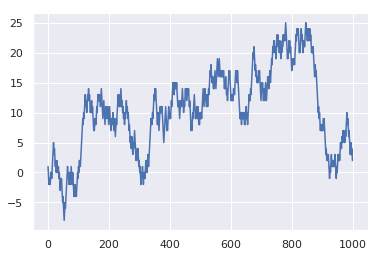

In [23]:
nsteps= 1000
draws=np.random.randint(0,2,nsteps)
steps= np.where(draws>0,1,-1)
walk= steps.cumsum()
plt.plot(walk);

**Several random walks at once:**

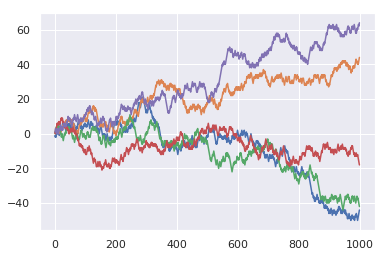

In [37]:
nsteps=1000
nwalks=5000

draws= np.random.randint(0,2,(nwalks,nsteps))
steps= np.where(draws>0,1,-1)
walk= steps.cumsum(axis=1)
plt.plot(walk[0,:])
plt.plot(walk[1,:])
plt.plot(walk[2,:])
plt.plot(walk[3,:])
plt.plot(walk[4,:]);

How many walks are unique:

In [47]:
np.unique(walk[:,-1]).size

105

All these walks starts at 0 and ends at 0:

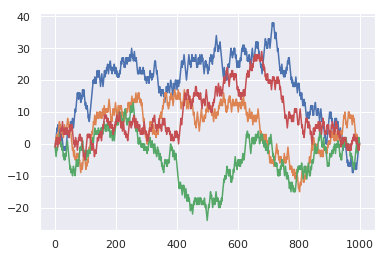

In [54]:
x=walk[walk[:,-1]==0]
plt.plot(x[0,:])
plt.plot(x[1,:])
plt.plot(x[2,:])
plt.plot(x[3,:])

## **Remaining topics to cover:**

1. _Pandas Time Series Analysis:  [youtube videos](https://www.youtube.com/watch?v=r0s4slGHwzE&list=PLeo1K3hjS3uvMADnFjV1yg6E5nVU4kOob)_
2. _Pandas Data loading, storate and file formats (page 167, pandas for data analysis)_